<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Краткое-описание" data-toc-modified-id="Краткое-описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Краткое описание</strong></a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Расчеты-для-каждого-пользователя" data-toc-modified-id="Расчеты-для-каждого-пользователя-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчеты для каждого пользователя</a></span></li><li><span><a href="#Анализ-данных-по-тарифам" data-toc-modified-id="Анализ-данных-по-тарифам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ данных по тарифам</a></span><ul class="toc-item"><li><span><a href="#Минуты" data-toc-modified-id="Минуты-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Минуты</a></span></li><li><span><a href="#СМС" data-toc-modified-id="СМС-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>СМС</a></span></li><li><span><a href="#Интернет" data-toc-modified-id="Интернет-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Интернет</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

 **Определение перспективного тарифа для телеком-компании**


## **Краткое описание**

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Доступны данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
*Описание тарифов:*
- 1. Тариф «Смарт»
    - Ежемесячная плата: 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
- 2. Тариф «Ультра»
    - Ежемесячная плата: 1950 рублей
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей


## Предобработка данных

Загрузим и познакомимся с данными

In [1]:
# Загрузка библилиотек
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# Загрузка файлов 
internet = pd.read_csv('/datasets/internet.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
users = pd.read_csv('/datasets/users.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [8]:
# Изменение типа данных на дату
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [9]:
# Округление данных
calls['duration'] = np.ceil(calls['duration']).astype('int')
#internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

In [10]:
# Дополнительные столбцы с месяцами
internet['month'] = internet['session_date'].dt.month
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [11]:
# Описательные статистики
internet.describe()

,Unnamed: 0,mb_used,user_id,month
count,149396.000000,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842,8.563315
std,43127.054745,278.300951,144.050823,2.788717
min,0.000000,0.000000,1000.000000,1.000000
25%,37348.750000,138.187500,1130.000000,7.000000
50%,74697.500000,348.015000,1251.000000,9.000000
75%,112046.250000,559.552500,1380.000000,11.000000
max,149395.000000,1724.830000,1499.000000,12.000000


In [12]:
calls.describe()

,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,7.158198,1253.940619,8.574067
std,5.959173,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,2.000000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,11.000000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


In [13]:
messages.describe()

,user_id,month
count,123036.000000,123036.000000
mean,1256.989410,8.632262
std,143.523967,2.747328
min,1000.000000,1.000000
25%,1134.000000,7.000000
50%,1271.000000,9.000000
75%,1381.000000,11.000000
max,1499.000000,12.000000


In [14]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [15]:
# Группировка баз данных перед объединением
internet_group = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
calls_group = calls.groupby(['user_id', 'month']).agg({'duration': 'sum','id': 'count'}).reset_index()
messages_group = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()

In [16]:
internet_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3203 non-null   int64  
 1   month    3203 non-null   int64  
 2   mb_used  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


In [17]:
calls_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   3174 non-null   int64
 1   month     3174 non-null   int64
 2   duration  3174 non-null   int64
 3   id        3174 non-null   int64
dtypes: int64(4)
memory usage: 99.3 KB


In [18]:
messages_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  2717 non-null   int64
 1   month    2717 non-null   int64
 2   id       2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


In [19]:
# Объединим базы
data = internet_group.merge(calls_group, on=['user_id', 'month'], how='outer')
data_1 = data.merge(messages_group, on = ['user_id', 'month'], how = 'outer', suffixes = ('_sms','_count'))
# Посмотрим, что получилось
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   mb_used   3203 non-null   float64
 3   duration  3174 non-null   float64
 4   id_sms    3174 non-null   float64
 5   id_count  2717 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [20]:
# Лучше переименовать столбцы
data_1.rename(columns = {'id_sms': 'sms'}, inplace = True)
data_1.rename(columns = {'id_count': 'calls_count'}, inplace = True)

In [21]:
# Посмотрим пропуски
data_1.isna().sum()

user_id          0
month            0
mb_used         11
duration        40
sms             40
calls_count    497
dtype: int64

In [22]:
# Заменим на 0
data_1.fillna(0).astype('int')

,user_id,month,mb_used,duration,sms,calls_count
0,1000,5,2253,159,22,22
1,1000,6,23233,172,43,60
2,1000,7,14003,340,47,75
3,1000,8,14055,408,52,81
4,1000,9,14568,466,58,57
...,...,...,...,...,...,...
3209,1273,11,0,272,45,29
3210,1273,12,0,260,41,39
3211,1377,2,0,179,23,2
3212,1392,2,0,13,2,3


In [23]:
# Добавим остальные базы
data_2 = data_1.merge(users, how = 'left')
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3214 non-null   int64         
 1   month        3214 non-null   int64         
 2   mb_used      3203 non-null   float64       
 3   duration     3174 non-null   float64       
 4   sms          3174 non-null   float64       
 5   calls_count  2717 non-null   float64       
 6   age          3214 non-null   int64         
 7   churn_date   187 non-null    datetime64[ns]
 8   city         3214 non-null   object        
 9   first_name   3214 non-null   object        
 10  last_name    3214 non-null   object        
 11  reg_date     3214 non-null   datetime64[ns]
 12  tariff       3214 non-null   object        
dtypes: datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 351.5+ KB


In [24]:
data_3 = data_2.merge(tariffs, left_on='tariff', right_on='tariff_name', how='outer')
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   mb_used                3203 non-null   float64       
 3   duration               3174 non-null   float64       
 4   sms                    3174 non-null   float64       
 5   calls_count            2717 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

In [25]:
data_3.fillna(0)

,user_id,month,mb_used,duration,sms,calls_count,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,2253.49,159.0,22.0,22.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,23233.77,172.0,43.0,60.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,14003.64,340.0,47.0,75.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,14055.93,408.0,52.0,81.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,14568.91,466.0,58.0,57.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1499,9,1845.75,70.0,9.0,11.0,35,0,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3210,1499,10,17788.51,449.0,68.0,48.0,35,0,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3211,1499,11,17963.31,612.0,74.0,59.0,35,0,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3212,1499,12,13055.58,492.0,69.0,66.0,35,0,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart


### Вывод

1. Значения 0 есть только в продолжительности звонков, трафика и смс. Значения корректировать не нужно, т.к. 0 - отсутствие звонков и смс или потребления траффика.
2. В данных о возрасте абонента минимальное значение 18, максимальное - 75 лет, что вполне нормально, выбросов нет.
3. Все данные сведены в одну базу.

## Анализ данных

### Расчеты для каждого пользователя

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [26]:
data_3.pivot_table(index = ['user_id', 'month'], values = ['duration', 'calls_count'], aggfunc = ['sum'])

sum         
              calls_count duration
user_id month                     
1000    5            22.0    159.0
        6            60.0    172.0
        7            75.0    340.0
        8            81.0    408.0
        9            57.0    466.0
...                   ...      ...
1498    10           42.0    247.0
1499    9            11.0     70.0
        10           48.0    449.0
        11           59.0    612.0
        12           66.0    492.0

[3214 rows x 2 columns]

**Количество отправленных сообщений по месяцам**

In [27]:
data_3.pivot_table(index = ['user_id', 'month'], values = 'sms', aggfunc = ['sum'])

sum
                sms
user_id month      
1000    5      22.0
        6      43.0
        7      47.0
        8      52.0
        9      58.0
...             ...
1498    10     41.0
1499    9       9.0
        10     68.0
        11     74.0
        12     69.0

[3214 rows x 1 columns]

**Объем израсходованного интернет-трафика по месяцам**

In [28]:
data_3.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum'])

sum
                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3214 rows x 1 columns]

**Помесячная выручка с каждого пользователя**

In [29]:
# Создадим столбцы с разницой потраченного абонентом, и включенного в тарифный план
data_3['duration_over'] = data_3['duration'] - data_3['minutes_included']
data_3['sms_over'] = data_3['sms'] - data_3['messages_included']
data_3['gb_over'] = np.ceil(((data_3['mb_used'] - data_3['mb_per_month_included']) / 1024))

In [30]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   mb_used                3203 non-null   float64       
 3   duration               3174 non-null   float64       
 4   sms                    3174 non-null   float64       
 5   calls_count            2717 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

In [31]:
def call_pay(row):
    total = row['rub_monthly_fee']
    if row['duration_over'] > 0:
        total += row['duration_over'] * row['rub_per_minute']
    if row['sms_over'] > 0:
        total += row['sms_over'] * row['rub_per_message']
    if row['gb_over'] > 0:
        total += row['gb_over'] * row['rub_per_gb']
    return total

data_3['revenue'] = data_3.apply(call_pay, axis = 1)


In [32]:
data_3.query("user_id == 1499")

,user_id,month,mb_used,duration,sms,calls_count,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,duration_over,sms_over,gb_over,revenue
3209,1499,9,1845.75,70.0,9.0,11.0,35,NaT,Пермь,Гектор,...,500,550,200,3,3,smart,-430.0,-41.0,-13.0,550.0
3210,1499,10,17788.51,449.0,68.0,48.0,35,NaT,Пермь,Гектор,...,500,550,200,3,3,smart,-51.0,18.0,3.0,1204.0
3211,1499,11,17963.31,612.0,74.0,59.0,35,NaT,Пермь,Гектор,...,500,550,200,3,3,smart,112.0,24.0,3.0,1558.0
3212,1499,12,13055.58,492.0,69.0,66.0,35,NaT,Пермь,Гектор,...,500,550,200,3,3,smart,-8.0,19.0,-2.0,607.0


In [33]:
data_3['revenue'] = np.ceil(data_3['revenue']).astype('int')

In [34]:
data_3.fillna(0)

,user_id,month,mb_used,duration,sms,calls_count,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,duration_over,sms_over,gb_over,revenue
0,1000,5,2253.49,159.0,22.0,22.0,52,0,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,-2841.0,-978.0,-27.0,1950
1,1000,6,23233.77,172.0,43.0,60.0,52,0,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,-2828.0,-957.0,-7.0,1950
2,1000,7,14003.64,340.0,47.0,75.0,52,0,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,-2660.0,-953.0,-16.0,1950
3,1000,8,14055.93,408.0,52.0,81.0,52,0,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,-2592.0,-948.0,-16.0,1950
4,1000,9,14568.91,466.0,58.0,57.0,52,0,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,-2534.0,-942.0,-15.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1499,9,1845.75,70.0,9.0,11.0,35,0,Пермь,Гектор,...,500,550,200,3,3,smart,-430.0,-41.0,-13.0,550
3210,1499,10,17788.51,449.0,68.0,48.0,35,0,Пермь,Гектор,...,500,550,200,3,3,smart,-51.0,18.0,3.0,1204
3211,1499,11,17963.31,612.0,74.0,59.0,35,0,Пермь,Гектор,...,500,550,200,3,3,smart,112.0,24.0,3.0,1558
3212,1499,12,13055.58,492.0,69.0,66.0,35,0,Пермь,Гектор,...,500,550,200,3,3,smart,-8.0,19.0,-2.0,607


In [35]:
data_3['revenue'].describe()

count    3214.000000
mean     1548.935594
std       806.282911
min       550.000000
25%       762.000000
50%      1719.500000
75%      1950.000000
max      6920.000000
Name: revenue, dtype: float64

In [36]:
data_3.pivot_table(index = ['user_id', 'month', 'tariff'], values = 'revenue', aggfunc = ['sum'])

sum
                     revenue
user_id month tariff        
1000    5     ultra     1950
        6     ultra     1950
        7     ultra     1950
        8     ultra     1950
        9     ultra     1950
...                      ...
1498    10    smart     1750
1499    9     smart      550
        10    smart     1204
        11    smart     1558
        12    smart      607

[3214 rows x 1 columns]

In [37]:
data_3.pivot_table(index = 'tariff', values = 'revenue', aggfunc = ['sum', 'mean'])

,sum,mean
,revenue,revenue
tariff,,
smart,2939179,1318.608793
ultra,2039100,2070.152284


### Анализ данных по тарифам

#### Минуты

In [38]:
# Минуты тариф ultra
ultra = data_3.query('tariff == "ultra"').reset_index()
ultra.pivot_table(index='month', values='duration', aggfunc = 'mean')

,duration
month,
1,428.111111
2,297.125000
3,489.648649
4,475.301887
5,534.250000
6,497.469136
7,564.397727
8,530.611650
9,558.882883


In [39]:
print('Среднее значение', ultra['duration'].mean())
print('Дисперсия', np.var(ultra['duration'], ddof=1))
print('Стандартное отклонение', np.std(ultra['duration'], ddof=1))

Среднее значение 545.4511041009464
Дисперсия 94203.41839614809
Стандартное отклонение 306.9257538821858


In [40]:
# Минуты тариф smart
smart = data_3.query('tariff == "smart"').reset_index()
smart.pivot_table(index='month', values='duration', aggfunc = 'mean')


,duration
month,
1,203.852941
2,298.689655
3,390.051948
4,367.133929
5,387.361702
6,398.067485
7,408.353234
8,423.269231
9,430.266409


In [41]:
print('Среднее значение', smart['duration'].mean())
print('Дисперсия', np.var(smart['duration'], ddof=1))
print('Стандартное отклонение', np.std(smart['duration'], ddof=1))

Среднее значение 419.0629779577148
Дисперсия 35844.1895513438
Стандартное отклонение 189.3256177894154


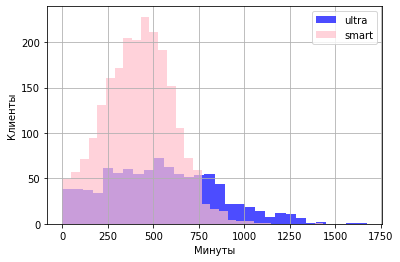

In [42]:
ultra['duration'].hist(bins=30, label='ultra', color='blue', alpha=0.7)
smart['duration'].hist(bins=30, label='smart', color='pink', alpha=0.7)
plt.legend()
plt.xlabel('Минуты')
plt.ylabel('Клиенты')
plt.show()

#### СМС

In [43]:
# СМС тариф ultra
ultra.pivot_table(index='month', values='sms', aggfunc = 'mean')

,sms
month,
1,59.444444
2,41.541667
3,67.675676
4,66.509434
5,75.906250
6,69.209877
7,78.363636
8,74.058252
9,77.288288


In [44]:
print('Среднее значение', ultra['sms'].mean())
print('Дисперсия', np.var(ultra['sms'], ddof=1))
print('Стандартное отклонение', np.std(ultra['sms'], ddof=1))

Среднее значение 76.01682439537329
Дисперсия 1798.043927168078
Стандартное отклонение 42.40334806554876


In [45]:
# СМС тариф smart
smart.pivot_table(index='month', values='sms', aggfunc = 'mean')

,sms
month,
1,27.676471
2,40.189655
3,54.324675
4,51.312500
5,55.241135
6,55.889571
7,56.726368
8,59.230769
9,59.776062


In [46]:
print('Среднее значение', smart['sms'].mean())
print('Дисперсия', np.var(smart['sms'], ddof=1))
print('Стандартное отклонение', np.std(smart['sms'], ddof=1))

Среднее значение 58.62123256860099
Дисперсия 665.4388289031333
Стандартное отклонение 25.796101040721897


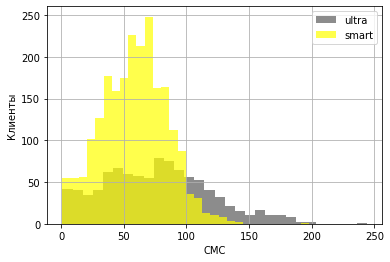

In [47]:
ultra['sms'].hist(bins=30, label='ultra', color='grey', alpha=0.9)
smart['sms'].hist(bins=30, label='smart', color='yellow', alpha=0.7)
plt.legend()
plt.xlabel('СМС')
plt.ylabel('Клиенты')
plt.show()

#### Интернет

In [48]:
# Интернет тариф ultra
ultra.pivot_table(index='month', values='mb_used', aggfunc = 'mean')

,mb_used
month,
1,13140.681111
2,12846.477273
3,17535.550270
4,16828.134364
5,19656.534091
6,19152.950602
7,20723.394778
8,19760.734434
9,19372.735702


In [49]:
print('Среднее значение', ultra['mb_used'].mean())
print('Дисперсия', np.var(ultra['mb_used'], ddof=1))
print('Стандартное отклонение', np.std(ultra['sms'], ddof=1))

Среднее значение 19668.485261538463
Дисперсия 98864248.95263153
Стандартное отклонение 42.40334806554876


In [50]:
# Интернет тариф smart
smart.pivot_table(index='month', values='mb_used', aggfunc = 'mean')

,mb_used
month,
1,8513.717647
2,11597.054310
3,15104.159091
4,13462.180625
5,15805.184326
6,15794.647988
7,15743.150348
8,16681.706068
9,16303.578808


In [51]:
print('Среднее значение', smart['mb_used'].mean())
print('Дисперсия', np.var(smart['mb_used'], ddof=1))
print('Стандартное отклонение', np.std(smart['mb_used'], ddof=1))

Среднее значение 16215.661849192102
Дисперсия 34359951.682283156
Стандартное отклонение 5861.736234451629


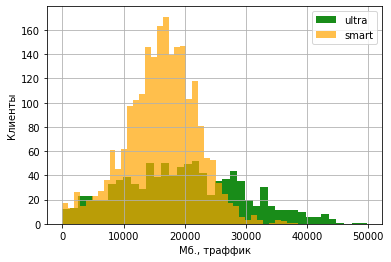

In [52]:
ultra['mb_used'].hist(bins=40, label='ultra', color='green', alpha=0.9)
smart['mb_used'].hist(bins=40, label='smart', color='orange', alpha=0.7)
plt.legend()
plt.xlabel('Мб., траффик')
plt.ylabel('Клиенты')
plt.show()

### Вывод
**Звонки**
Пользоватили тарифа ultra, в среднем тратят 546 минут на разговоры по телефону. Меньше всего в феврале - 297 минут, больше всего в декабре - 615 минут.
Пользователи тарифа smart, в среднем тратят 419 минут на разговоры по телефону. Меньше всего в феврале - 204 минуты, больше всего в декабре - 480 минут.
Большая часть пользователей обеих групп тратит на разговоры по телефону 250 - 750 минут в месяц.

**СМС**
Пользоватили тарифа ultra, в среднем отправляют 61 смс в месяц. Меньше всего в феврале - 33 смс, больше всего в декабре - 72 смс.
Пользователи тарифа smart, в среднем отправляют 39 смс в месяц. Меньше всего в январе - 20 смс, больше всего в декабре - 42 смс.
Достаточно большое число пользователей обеих групп или не пользуются смс, или отправляют единичные сообщения.

**Интернет**
Пользоватили тарифа ultra, в среднем тратят 19668 мб. трафика. Меньше всего в феврале - 13140 мб., больше всего в декабре - 21951 мб.
Пользователи тарифа smart, в среднем тратят 16215 мб. трафика. Меньше всего в январе - 8513 мб., больше всего в декабре - 18113 мб.
Пользователи тарифа ultra часто используют до 30000 мб., smart - до 25000 мб.

В среднем, выручка с 1 пользователя тарифа smart - 1318 руб., тарифа ultra - 2070 руб. в месяц. Стоимость пакетов - smart 550 руб., ultra - 1950 руб. Пользователи тарифа smart достаточно часто выходят за лимит услуг предусмотренных тарифным планом, но все равно, их затраты намного меньше стоимости тарифа ultra. Предлагать смену тарифного плана в массовом порядке не имеет смысла.



Во всех трех случаях распределение - распределение Пуассона, т.к это распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

## Проверка гипотез

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Н0 - средняя выручка пользователей тарифов «Ультра» равна средней выручке пользователей тарифов «Смарт» 
Н1 - средняя выручка пользователей тарифов «Ультра» не равна средней выручка пользователей тарифов «Смарт»

Средняя выручка, в случае неравенства, может быть меньше или больше. Тест двухстороний. Выборки достаточно большие. Параметр equal_var лучше задать False, тест посчитает дисперсии выборок по отдельности

In [53]:

alpha = .05

results = st.ttest_ind(
    ultra['revenue'], 
    smart['revenue'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0519833366062768e-228
Отвергаем нулевую гипотезу


Выше по тексту, мы уже смотрели средние выручки и видели, что они не равны. В данном случае, мы могли просто сравнить два средних значения, или провести тест.

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

In [54]:
# Создадим нужные срезы
data_3['city'].unique()

array(['Краснодар', 'Москва', 'Новокузнецк', 'Иваново', 'Омск', 'Уфа',
       'Томск', 'Санкт-Петербург', 'Тверь', 'Ярославль', 'Тюмень',
       'Ростов-на-Дону', 'Калуга', 'Тула', 'Волгоград', 'Саранск',
       'Иркутск', 'Череповец', 'Набережные Челны', 'Новосибирск',
       'Брянск', 'Тольятти', 'Нижний Тагил', 'Воронеж', 'Махачкала',
       'Пермь', 'Сургут', 'Пенза', 'Мурманск', 'Самара',
       'Нижний Новгород', 'Кемерово', 'Кострома', 'Оренбург', 'Чебоксары',
       'Магнитогорск', 'Астрахань', 'Нижневартовск', 'Челябинск',
       'Красноярск', 'Владивосток', 'Смоленск', 'Владимир', 'Казань',
       'Курган', 'Саратов', 'Севастополь', 'Рязань', 'Екатеринбург',
       'Стерлитамак', 'Ульяновск', 'Балашиха', 'Барнаул', 'Киров', 'Сочи',
       'Вологда', 'Чита', 'Петрозаводск', 'Хабаровск', 'Ставрополь',
       'Улан-Удэ', 'Курск', 'Якутск', 'Химки', 'Владикавказ', 'Ижевск',
       'Орёл', 'Белгород', 'Архангельск', 'Липецк', 'Волжский', 'Тамбов',
       'Калининград', 'Новороссий

In [55]:
moscow = data_3.query('city == "Москва"').reset_index()

In [56]:
other = data_3.query('city != "Москва"').reset_index()

Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов 
Н1 - средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов

Средняя выручка, в случае неравенства, может быть меньше или больше. Тест двухстороний. Выборки достаточно большие. Параметр equal_var лучше задать False, тест посчитает дисперсии выборок по отдельности

In [57]:
alpha = .05

results = st.ttest_ind(
    moscow['revenue'], 
    other['revenue'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5305308576929098
Не получилось отвергнуть нулевую гипотезу


In [58]:
print('средняя выручка пользователей из Москвы:', moscow['revenue'].mean().round(0))
print('средняя выручка пользователей из других регионов:', other['revenue'].mean().round(0))

средняя выручка пользователей из Москвы: 1566.0
средняя выручка пользователей из других регионов: 1545.0


Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Общий вывод

In [59]:
# иллюстрация для общего вывода
data_3.pivot_table(index = 'tariff', values = 'revenue', aggfunc = ['sum', 'mean', 'count'])

,sum,mean,count
,revenue,revenue,revenue
tariff,,,
smart,2939179,1318.608793,2229
ultra,2039100,2070.152284,985


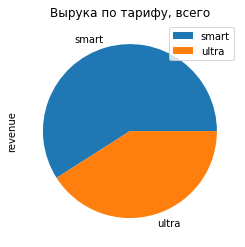

In [60]:
data_3.pivot_table(index = 'tariff', values = 'revenue', aggfunc = 'sum').plot(kind='pie', subplots=True)
plt.title('Вырука по тарифу, всего')
plt.show()

Основной задачей исследования являлось - определение тарифа, приносящего больше денег оператору. Эта информация должна послужить аргументом для корректировки рекламного бюджета.
Несмотря на то, что стредняя выручка тарифа smart почти на 40% ниже средней выручки тарифа ultra, массовость тарифа smart обеспечивает почти 60% общей выручки (здесь под общей выручкой понимается сумма выручек двух анализируемых тарифов).
Если отвечать на вопрос - какой тариф лучше для оператора, ориентируясь только на выручку, то smart.
При составлении бюджета рекламной кампании, большее внимание стоит уделить тарифу smart, т.к. для абонента он все равно дешевле, чем ultra, а для оператора выгоднее.